<h1 style="text-align: center;">Data Analytics | OpenData NYC</h3>

<h3 style="text-align: center;">Compiler Cowboyz </h3

## Prerequisites

### 1.) Transform Parquet File into CSV File for easy usage

In [1]:
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
tqdm.pandas()

parquet_file = 'data/yellow_tripdata_2022-12.parquet'
output_csv = 'data/yellow_tripdata_2022-12.csv'

with tqdm(total=1, desc="Reading Parquet file") as pbar:
    df = pd.read_parquet(parquet_file)
    pbar.update(1)

with tqdm(total=1, desc="Writing to CSV") as pbar:
    df.to_csv(output_csv, index=False)
    pbar.update(1)

print("Conversion completed. The CSV file is saved as:", output_csv)



Reading Parquet file:   0%|          | 0/1 [00:00<?, ?it/s]

Writing to CSV:   0%|          | 0/1 [00:00<?, ?it/s]

Conversion completed. The CSV file is saved as: data/yellow_tripdata_2022-12.csv


#### 1,1.) Load Data

In [2]:
df = pd.read_csv("data/yellow_tripdata_2022-12.csv")
df.head(20)

C:\Users\johannes.larcher\AppData\Local\Temp\ipykernel_9256\3608145719.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/yellow_tripdata_2022-12.csv")


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-12-01 00:37:35,2022-12-01 00:47:35,1.0,2.00,1.0,N,170,237,1,8.5,3.00,0.5,3.10,0.00,0.3,15.40,2.5,0.00
1,1,2022-12-01 00:34:35,2022-12-01 00:55:21,0.0,8.40,1.0,N,138,141,2,26.0,4.25,0.5,0.00,0.00,0.3,31.05,2.5,1.25
2,1,2022-12-01 00:33:26,2022-12-01 00:37:34,1.0,0.80,1.0,N,140,140,1,5.0,3.00,0.5,1.76,0.00,0.3,10.56,2.5,0.00
3,1,2022-12-01 00:45:51,2022-12-01 00:53:16,1.0,3.00,1.0,N,141,79,3,10.0,3.00,0.5,0.00,0.00,0.3,13.80,2.5,0.00
4,2,2022-12-01 00:49:49,2022-12-01 00:54:13,1.0,0.76,1.0,N,261,231,1,5.0,0.50,0.5,1.76,0.00,0.3,10.56,2.5,0.00
5,1,2022-12-01 00:25:25,2022-12-01 00:35:38,2.0,2.60,1.0,N,237,164,1,10.5,3.00,0.5,4.25,0.00,0.3,18.55,2.5,0.00
6,2,2022-12-01 00:05:37,2022-12-01 00:10:48,1.0,0.94,1.0,N,79,144,1,5.5,0.50,0.5,1.86,0.00,0.3,11.16,2.5,0.00
7,2,2022-12-01 00:20:12,2022-12-01 00:28:49,1.0,2.09,1.0,N,79,186,1,9.0,0.50,0.5,2.00,0.00,0.3,14.80,2.5,0.00
8,1,2022-12-01 00:00:54,2022-12-01 00:05:41,1.0,0.80,1.0,N,142,143,1,5.5,3.00,0.5,1.85,0.00,0.3,11.15,2.5,0.00
9,2,2022-12-01 00:11:23,2022-12-01 00:30:00,1.0,7.62,1.0,N,138,255,1,24.0,0.50,0.5,5.31,0.00,0.3,31.86,0.0,1.25


## Data Cleaning 

#### 2.1.) Dataframe Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3399549 entries, 0 to 3399548
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
dtypes: float64(12), int64(4), object(3)
memory usage: 492.8+ MB


#### 2.2.) Check for Duplicates

In [4]:
duplicates = df[df.duplicated()]

print("Number of duplicate rows:", len(duplicates))

if len(duplicates) > 0:
    print("Duplicate Rows:")
    print(duplicates)

Number of duplicate rows: 0


#### 2.3.) Check for missing values

In [5]:
missing_data = df.isna().any()

print("Columns with missing data:")
for column, has_missing in missing_data.items():
    if has_missing:
        print(column)

Columns with missing data:
passenger_count
RatecodeID
store_and_fwd_flag
congestion_surcharge
airport_fee


#### 2.4.) Check for NaN values

In [6]:
nan_count = df.isna().sum()
total_rows = len(df)

print("Count and Percentage of NaN Values in Each Column:")
for column, count in nan_count.items():
    if count > 0:
        percentage = (count / total_rows) * 100
        print(f"{column}: {count} NaN values, {percentage:.2f}%")

Count and Percentage of NaN Values in Each Column:
passenger_count: 126463 NaN values, 3.72%
RatecodeID: 126463 NaN values, 3.72%
store_and_fwd_flag: 126463 NaN values, 3.72%
congestion_surcharge: 126463 NaN values, 3.72%
airport_fee: 126463 NaN values, 3.72%


#### 2.5.) Remove columns with missing values / NaN values

In [7]:
columns_to_remove = [
#   'passenger_count', 
    'RatecodeID', 
    'store_and_fwd_flag', 
    'congestion_surcharge', 
    'airport_fee'
]

for column in columns_to_remove:
    if column in df.columns:
        df.drop(column, axis=1, inplace=True)
        print(f"Column '{column}' has been removed.")
    else: 
        print("No columns to remove.")

Column 'RatecodeID' has been removed.
Column 'store_and_fwd_flag' has been removed.
Column 'congestion_surcharge' has been removed.
Column 'airport_fee' has been removed.


In [8]:
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3399549 entries, 0 to 3399548
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   payment_type           int64  
 8   fare_amount            float64
 9   extra                  float64
 10  mta_tax                float64
 11  tip_amount             float64
 12  tolls_amount           float64
 13  improvement_surcharge  float64
 14  total_amount           float64
dtypes: float64(9), int64(4), object(2)
memory usage: 389.0+ MB


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2022-12-01 00:37:35,2022-12-01 00:47:35,1.0,2.00,170,237,1,8.5,3.00,0.5,3.10,0.00,0.3,15.40
1,1,2022-12-01 00:34:35,2022-12-01 00:55:21,0.0,8.40,138,141,2,26.0,4.25,0.5,0.00,0.00,0.3,31.05
2,1,2022-12-01 00:33:26,2022-12-01 00:37:34,1.0,0.80,140,140,1,5.0,3.00,0.5,1.76,0.00,0.3,10.56
3,1,2022-12-01 00:45:51,2022-12-01 00:53:16,1.0,3.00,141,79,3,10.0,3.00,0.5,0.00,0.00,0.3,13.80
4,2,2022-12-01 00:49:49,2022-12-01 00:54:13,1.0,0.76,261,231,1,5.0,0.50,0.5,1.76,0.00,0.3,10.56
5,1,2022-12-01 00:25:25,2022-12-01 00:35:38,2.0,2.60,237,164,1,10.5,3.00,0.5,4.25,0.00,0.3,18.55
6,2,2022-12-01 00:05:37,2022-12-01 00:10:48,1.0,0.94,79,144,1,5.5,0.50,0.5,1.86,0.00,0.3,11.16
7,2,2022-12-01 00:20:12,2022-12-01 00:28:49,1.0,2.09,79,186,1,9.0,0.50,0.5,2.00,0.00,0.3,14.80
8,1,2022-12-01 00:00:54,2022-12-01 00:05:41,1.0,0.80,142,143,1,5.5,3.00,0.5,1.85,0.00,0.3,11.15
9,2,2022-12-01 00:11:23,2022-12-01 00:30:00,1.0,7.62,138,255,1,24.0,0.50,0.5,5.31,0.00,0.3,31.86


#### 2.6.) Filter by VendorID (1, 2)

In [9]:
df = df[df['VendorID'].isin([1, 2])]

# Anzeigen der gefilterten Daten
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3399113 entries, 0 to 3399548
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   payment_type           int64  
 8   fare_amount            float64
 9   extra                  float64
 10  mta_tax                float64
 11  tip_amount             float64
 12  tolls_amount           float64
 13  improvement_surcharge  float64
 14  total_amount           float64
dtypes: float64(9), int64(4), object(2)
memory usage: 414.9+ MB


#### 2.7.) Check for correct time

##### 2.7.1.) Check for correct time (tpep_pickup_datetime)

In [10]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

start_date = '2022-12-01 00:00:00'
end_date = '2022-12-31 23:59:59'

df = df[(df['tpep_pickup_datetime'] >= start_date) & (df['tpep_pickup_datetime'] <= end_date)]
df.head()
df.info()

print("DataFrame has been updated to include only records between December 1, 2022, and December 31, 2022.")


<class 'pandas.core.frame.DataFrame'>
Index: 3399067 entries, 0 to 3399548
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  object        
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   PULocationID           int64         
 6   DOLocationID           int64         
 7   payment_type           int64         
 8   fare_amount            float64       
 9   extra                  float64       
 10  mta_tax                float64       
 11  tip_amount             float64       
 12  tolls_amount           float64       
 13  improvement_surcharge  float64       
 14  total_amount           float64       
dtypes: datetime64[ns](1), float64(9), int64(4), object(1)
memory usage: 414.9+ MB
DataFrame has been updated to include only records between December 1, 2022, a

##### 2.7.2.) Check for correct time (tpep_dropoff_datetime)

In [11]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

start_date = '2022-12-01 00:00:00'
end_date = '2022-12-31 23:59:59'

df = df[(df['tpep_dropoff_datetime'] >= start_date) & (df['tpep_dropoff_datetime'] <= end_date)]
df.head()
df.info()

print("DataFrame has been updated to include only records between December 1, 2022, and December 31, 2022.")

<class 'pandas.core.frame.DataFrame'>
Index: 3398482 entries, 0 to 3399548
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   PULocationID           int64         
 6   DOLocationID           int64         
 7   payment_type           int64         
 8   fare_amount            float64       
 9   extra                  float64       
 10  mta_tax                float64       
 11  tip_amount             float64       
 12  tolls_amount           float64       
 13  improvement_surcharge  float64       
 14  total_amount           float64       
dtypes: datetime64[ns](2), float64(9), int64(4)
memory usage: 414.9 MB
DataFrame has been updated to include only records between December 1, 2022, and December 

##### 2.7.3.) Remove dates outside of scope

In [12]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Define the date range
start_date = '2022-12-01'
end_date = '2022-12-31'

# Filter the DataFrame
df = df[(df['tpep_pickup_datetime'] >= start_date) & (df['tpep_pickup_datetime'] <= end_date) & 
        (df['tpep_dropoff_datetime'] >= start_date) & (df['tpep_dropoff_datetime'] <= end_date)]

print("DataFrame has been updated to include only records where both pickup and dropoff dates are between December 1, 2022, and December 31, 2022.")

df.head(10)

DataFrame has been updated to include only records where both pickup and dropoff dates are between December 1, 2022, and December 31, 2022.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2022-12-01 00:37:35,2022-12-01 00:47:35,1.0,2.00,170,237,1,8.5,3.00,0.5,3.10,0.0,0.3,15.40
1,1,2022-12-01 00:34:35,2022-12-01 00:55:21,0.0,8.40,138,141,2,26.0,4.25,0.5,0.00,0.0,0.3,31.05
2,1,2022-12-01 00:33:26,2022-12-01 00:37:34,1.0,0.80,140,140,1,5.0,3.00,0.5,1.76,0.0,0.3,10.56
3,1,2022-12-01 00:45:51,2022-12-01 00:53:16,1.0,3.00,141,79,3,10.0,3.00,0.5,0.00,0.0,0.3,13.80
4,2,2022-12-01 00:49:49,2022-12-01 00:54:13,1.0,0.76,261,231,1,5.0,0.50,0.5,1.76,0.0,0.3,10.56
5,1,2022-12-01 00:25:25,2022-12-01 00:35:38,2.0,2.60,237,164,1,10.5,3.00,0.5,4.25,0.0,0.3,18.55
6,2,2022-12-01 00:05:37,2022-12-01 00:10:48,1.0,0.94,79,144,1,5.5,0.50,0.5,1.86,0.0,0.3,11.16
7,2,2022-12-01 00:20:12,2022-12-01 00:28:49,1.0,2.09,79,186,1,9.0,0.50,0.5,2.00,0.0,0.3,14.80
8,1,2022-12-01 00:00:54,2022-12-01 00:05:41,1.0,0.80,142,143,1,5.5,3.00,0.5,1.85,0.0,0.3,11.15
9,2,2022-12-01 00:11:23,2022-12-01 00:30:00,1.0,7.62,138,255,1,24.0,0.50,0.5,5.31,0.0,0.3,31.86


#### 2.8,) Ensure that tpep_pickup_datetime is always before tpep_dropoff_datetime

In [13]:
df = df[df['tpep_pickup_datetime'] < df['tpep_dropoff_datetime']]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3311318 entries, 0 to 3396239
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   PULocationID           int64         
 6   DOLocationID           int64         
 7   payment_type           int64         
 8   fare_amount            float64       
 9   extra                  float64       
 10  mta_tax                float64       
 11  tip_amount             float64       
 12  tolls_amount           float64       
 13  improvement_surcharge  float64       
 14  total_amount           float64       
dtypes: datetime64[ns](2), float64(9), int64(4)
memory usage: 404.2 MB


#### 2.9.) Remove negative fare_amount

In [14]:
df = df[df['fare_amount'] >= 0]
print(f"Removed negative fare amount values")

Removed negative fare amount values


## Data Enrichment

#### 3.1.) Tip per Person

In [15]:
tqdm.pandas(desc="Calculating tip per person")

df['tip_per_person'] = df.progress_apply(
    lambda row: row['tip_amount'] / row['passenger_count'] if row['passenger_count'] > 0 else 0, 
    axis=1
)

print("DataFrame has been updated with the 'tip_per_person' column.")

Calculating tip per person:   0%|          | 0/3284960 [00:00<?, ?it/s]

DataFrame has been updated with the 'tip_per_person' column.


In [16]:
df.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tip_per_person
0,1,2022-12-01 00:37:35,2022-12-01 00:47:35,1.0,2.00,170,237,1,8.5,3.00,0.5,3.10,0.00,0.3,15.40,3.100000
1,1,2022-12-01 00:34:35,2022-12-01 00:55:21,0.0,8.40,138,141,2,26.0,4.25,0.5,0.00,0.00,0.3,31.05,0.000000
2,1,2022-12-01 00:33:26,2022-12-01 00:37:34,1.0,0.80,140,140,1,5.0,3.00,0.5,1.76,0.00,0.3,10.56,1.760000
3,1,2022-12-01 00:45:51,2022-12-01 00:53:16,1.0,3.00,141,79,3,10.0,3.00,0.5,0.00,0.00,0.3,13.80,0.000000
4,2,2022-12-01 00:49:49,2022-12-01 00:54:13,1.0,0.76,261,231,1,5.0,0.50,0.5,1.76,0.00,0.3,10.56,1.760000
5,1,2022-12-01 00:25:25,2022-12-01 00:35:38,2.0,2.60,237,164,1,10.5,3.00,0.5,4.25,0.00,0.3,18.55,2.125000
6,2,2022-12-01 00:05:37,2022-12-01 00:10:48,1.0,0.94,79,144,1,5.5,0.50,0.5,1.86,0.00,0.3,11.16,1.860000
7,2,2022-12-01 00:20:12,2022-12-01 00:28:49,1.0,2.09,79,186,1,9.0,0.50,0.5,2.00,0.00,0.3,14.80,2.000000
8,1,2022-12-01 00:00:54,2022-12-01 00:05:41,1.0,0.80,142,143,1,5.5,3.00,0.5,1.85,0.00,0.3,11.15,1.850000
9,2,2022-12-01 00:11:23,2022-12-01 00:30:00,1.0,7.62,138,255,1,24.0,0.50,0.5,5.31,0.00,0.3,31.86,5.310000


#### 3.2.) Revenue per Distance Unit

In [17]:
tqdm.pandas(desc="Calculating Revenue per Distance Unit")

df['revenue_per_distance_unit'] = df.progress_apply(
    lambda row: row['total_amount'] / row['trip_distance'] if row['trip_distance'] > 0 else 0,
    axis=1
)

print("DataFrame has been updated with the 'revenue_per_distance_unit' column.")

Calculating Revenue per Distance Unit:   0%|          | 0/3284960 [00:00<?, ?it/s]

DataFrame has been updated with the 'revenue_per_distance_unit' column.


In [18]:
df.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tip_per_person,revenue_per_distance_unit
0,1,2022-12-01 00:37:35,2022-12-01 00:47:35,1.0,2.00,170,237,1,8.5,3.00,0.5,3.10,0.00,0.3,15.40,3.100000,7.700000
1,1,2022-12-01 00:34:35,2022-12-01 00:55:21,0.0,8.40,138,141,2,26.0,4.25,0.5,0.00,0.00,0.3,31.05,0.000000,3.696429
2,1,2022-12-01 00:33:26,2022-12-01 00:37:34,1.0,0.80,140,140,1,5.0,3.00,0.5,1.76,0.00,0.3,10.56,1.760000,13.200000
3,1,2022-12-01 00:45:51,2022-12-01 00:53:16,1.0,3.00,141,79,3,10.0,3.00,0.5,0.00,0.00,0.3,13.80,0.000000,4.600000
4,2,2022-12-01 00:49:49,2022-12-01 00:54:13,1.0,0.76,261,231,1,5.0,0.50,0.5,1.76,0.00,0.3,10.56,1.760000,13.894737
5,1,2022-12-01 00:25:25,2022-12-01 00:35:38,2.0,2.60,237,164,1,10.5,3.00,0.5,4.25,0.00,0.3,18.55,2.125000,7.134615
6,2,2022-12-01 00:05:37,2022-12-01 00:10:48,1.0,0.94,79,144,1,5.5,0.50,0.5,1.86,0.00,0.3,11.16,1.860000,11.872340
7,2,2022-12-01 00:20:12,2022-12-01 00:28:49,1.0,2.09,79,186,1,9.0,0.50,0.5,2.00,0.00,0.3,14.80,2.000000,7.081340
8,1,2022-12-01 00:00:54,2022-12-01 00:05:41,1.0,0.80,142,143,1,5.5,3.00,0.5,1.85,0.00,0.3,11.15,1.850000,13.937500
9,2,2022-12-01 00:11:23,2022-12-01 00:30:00,1.0,7.62,138,255,1,24.0,0.50,0.5,5.31,0.00,0.3,31.86,5.310000,4.181102


#### 3.3.) Total Revenue per Vendor

In [19]:
total_revenue_per_vendor = df.groupby('VendorID')['total_amount'].sum().reset_index()
total_revenue_per_vendor.rename(columns={'total_amount': 'total_revenue_per_vendor_id'}, inplace=True)

# Merge the total revenue per vendor with the original DataFrame
df = df.merge(total_revenue_per_vendor, on='VendorID', how='left')

print("DataFrame has been updated with the total_revenue_per_vendor_id' column.")

DataFrame has been updated with the total_revenue_per_vendor_id' column.


In [20]:
df.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tip_per_person,revenue_per_distance_unit,total_revenue_per_vendor_id
0,1,2022-12-01 00:37:35,2022-12-01 00:47:35,1.0,2.00,170,237,1,8.5,3.00,0.5,3.10,0.00,0.3,15.40,3.100000,7.700000,21144628.11
1,1,2022-12-01 00:34:35,2022-12-01 00:55:21,0.0,8.40,138,141,2,26.0,4.25,0.5,0.00,0.00,0.3,31.05,0.000000,3.696429,21144628.11
2,1,2022-12-01 00:33:26,2022-12-01 00:37:34,1.0,0.80,140,140,1,5.0,3.00,0.5,1.76,0.00,0.3,10.56,1.760000,13.200000,21144628.11
3,1,2022-12-01 00:45:51,2022-12-01 00:53:16,1.0,3.00,141,79,3,10.0,3.00,0.5,0.00,0.00,0.3,13.80,0.000000,4.600000,21144628.11
4,2,2022-12-01 00:49:49,2022-12-01 00:54:13,1.0,0.76,261,231,1,5.0,0.50,0.5,1.76,0.00,0.3,10.56,1.760000,13.894737,60503287.84
5,1,2022-12-01 00:25:25,2022-12-01 00:35:38,2.0,2.60,237,164,1,10.5,3.00,0.5,4.25,0.00,0.3,18.55,2.125000,7.134615,21144628.11
6,2,2022-12-01 00:05:37,2022-12-01 00:10:48,1.0,0.94,79,144,1,5.5,0.50,0.5,1.86,0.00,0.3,11.16,1.860000,11.872340,60503287.84
7,2,2022-12-01 00:20:12,2022-12-01 00:28:49,1.0,2.09,79,186,1,9.0,0.50,0.5,2.00,0.00,0.3,14.80,2.000000,7.081340,60503287.84
8,1,2022-12-01 00:00:54,2022-12-01 00:05:41,1.0,0.80,142,143,1,5.5,3.00,0.5,1.85,0.00,0.3,11.15,1.850000,13.937500,21144628.11
9,2,2022-12-01 00:11:23,2022-12-01 00:30:00,1.0,7.62,138,255,1,24.0,0.50,0.5,5.31,0.00,0.3,31.86,5.310000,4.181102,60503287.84


#### 3.4.) Median distance of all trips per day and hour


In [21]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_day'] = df['tpep_pickup_datetime'].dt.date
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Calculate the median trip distance for each day and hour
median_distance_per_day_hour = df.groupby(['pickup_day', 'pickup_hour'])['trip_distance'].median().reset_index()
median_distance_per_day_hour.rename(columns={'trip_distance': 'median_trip_distance_per_day_hour'}, inplace=True)

# Merge the median trip distance data with the original DataFrame
df = df.merge(median_distance_per_day_hour, on=['pickup_day', 'pickup_hour'], how='left')

print("DataFrame has been updated with the 'median_trip_distance_per_day_hour' column.")

DataFrame has been updated with the 'median_trip_distance_per_day_hour' column.


In [22]:
df.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,tip_per_person,revenue_per_distance_unit,total_revenue_per_vendor_id,pickup_day,pickup_hour,median_trip_distance_per_day_hour
0,1,2022-12-01 00:37:35,2022-12-01 00:47:35,1.0,2.00,170,237,1,8.5,3.00,...,3.10,0.00,0.3,15.40,3.100000,7.700000,21144628.11,2022-12-01,0,2.7
1,1,2022-12-01 00:34:35,2022-12-01 00:55:21,0.0,8.40,138,141,2,26.0,4.25,...,0.00,0.00,0.3,31.05,0.000000,3.696429,21144628.11,2022-12-01,0,2.7
2,1,2022-12-01 00:33:26,2022-12-01 00:37:34,1.0,0.80,140,140,1,5.0,3.00,...,1.76,0.00,0.3,10.56,1.760000,13.200000,21144628.11,2022-12-01,0,2.7
3,1,2022-12-01 00:45:51,2022-12-01 00:53:16,1.0,3.00,141,79,3,10.0,3.00,...,0.00,0.00,0.3,13.80,0.000000,4.600000,21144628.11,2022-12-01,0,2.7
4,2,2022-12-01 00:49:49,2022-12-01 00:54:13,1.0,0.76,261,231,1,5.0,0.50,...,1.76,0.00,0.3,10.56,1.760000,13.894737,60503287.84,2022-12-01,0,2.7
5,1,2022-12-01 00:25:25,2022-12-01 00:35:38,2.0,2.60,237,164,1,10.5,3.00,...,4.25,0.00,0.3,18.55,2.125000,7.134615,21144628.11,2022-12-01,0,2.7
6,2,2022-12-01 00:05:37,2022-12-01 00:10:48,1.0,0.94,79,144,1,5.5,0.50,...,1.86,0.00,0.3,11.16,1.860000,11.872340,60503287.84,2022-12-01,0,2.7
7,2,2022-12-01 00:20:12,2022-12-01 00:28:49,1.0,2.09,79,186,1,9.0,0.50,...,2.00,0.00,0.3,14.80,2.000000,7.081340,60503287.84,2022-12-01,0,2.7
8,1,2022-12-01 00:00:54,2022-12-01 00:05:41,1.0,0.80,142,143,1,5.5,3.00,...,1.85,0.00,0.3,11.15,1.850000,13.937500,21144628.11,2022-12-01,0,2.7
9,2,2022-12-01 00:11:23,2022-12-01 00:30:00,1.0,7.62,138,255,1,24.0,0.50,...,5.31,0.00,0.3,31.86,5.310000,4.181102,60503287.84,2022-12-01,0,2.7


## Visualizations

#### 4.1.) Total distance traveled per day over month

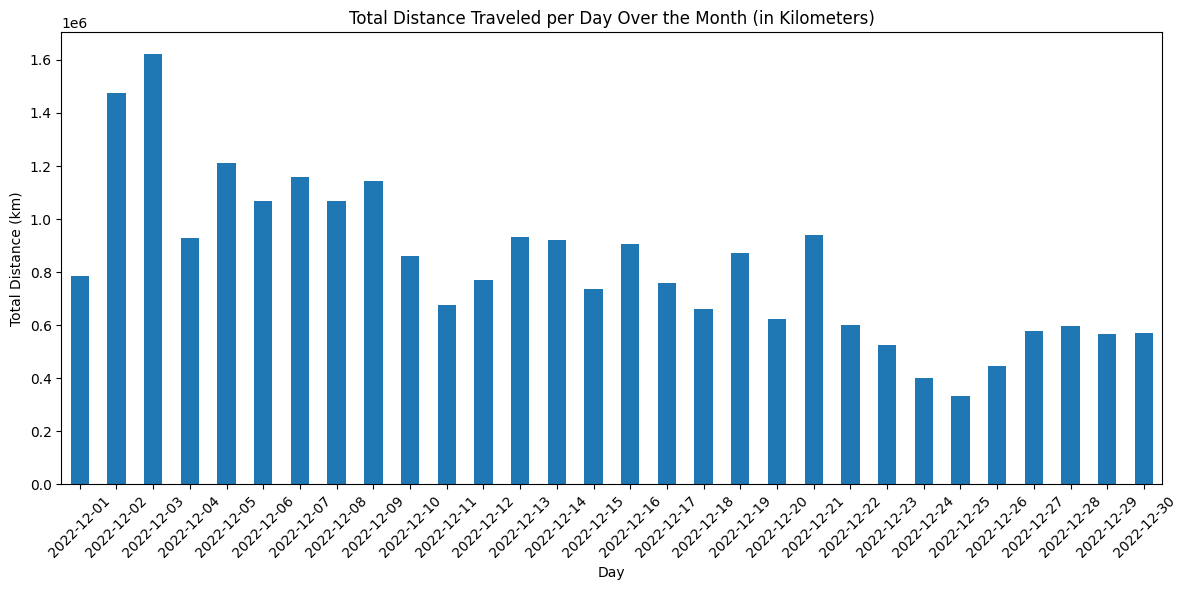

In [23]:
# Extract the day
df['pickup_day'] = df['tpep_pickup_datetime'].dt.date

# Assuming the trip distances are in miles, convert to kilometers
df['trip_distance_km'] = df['trip_distance'] * 1.60934

# Sum up the trip distance in kilometers for each day
daily_distance_km = df.groupby('pickup_day')['trip_distance_km'].sum()


# Plotting
plt.figure(figsize=(12, 6))
daily_distance_km.plot(kind='bar')
plt.title('Total Distance Traveled per Day Over the Month (in Kilometers)')
plt.xlabel('Day')
plt.ylabel('Total Distance (km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4.2.) Trips per hour of the day (0-23)

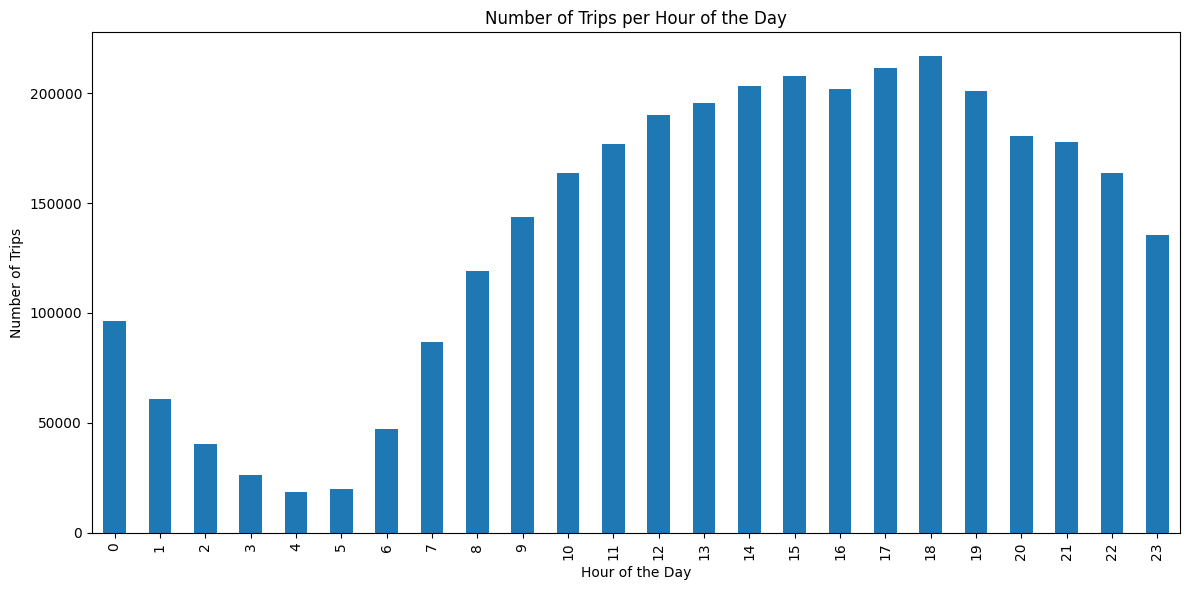

In [24]:
trips_per_hour = df['pickup_hour'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
trips_per_hour.plot(kind='bar')
plt.title('Number of Trips per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

#### 4.3.) Total sales (fare) per vendor

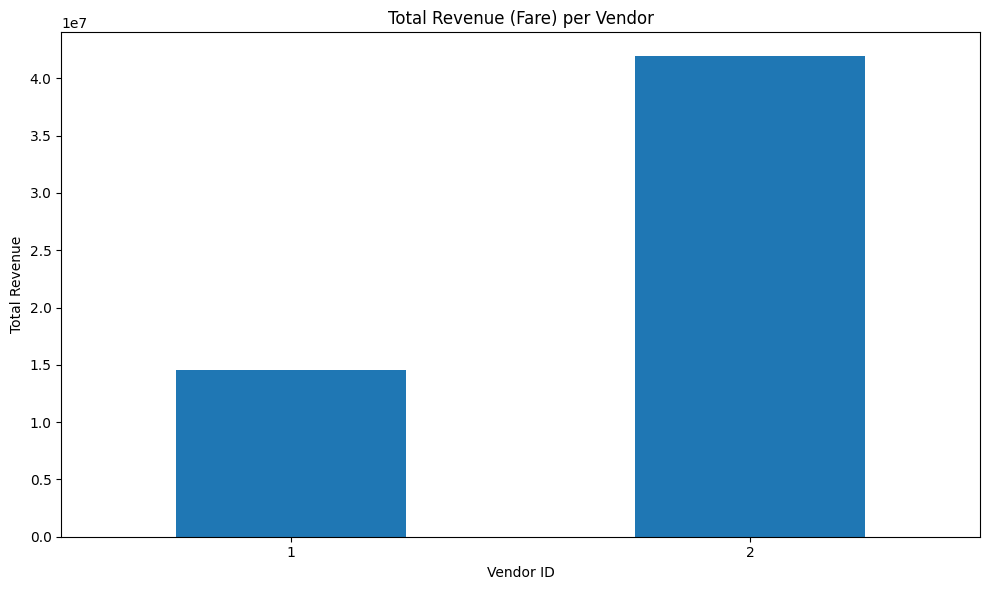

In [25]:
total_fare_per_vendor = df.groupby('VendorID')['fare_amount'].sum()

plt.figure(figsize=(10, 6))
total_fare_per_vendor.plot(kind='bar')
plt.title('Total Revenue (Fare) per Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### 4.4.) Box Plot von trip_distance per day

<Figure size 1500x800 with 0 Axes>

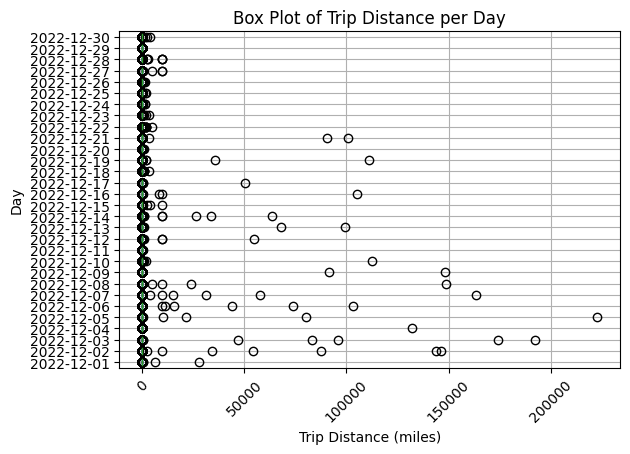

In [26]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_day'] = df['tpep_pickup_datetime'].dt.date

df = df[df['trip_distance'] >= 0]

plt.figure(figsize=(15, 8))
df.boxplot(column='trip_distance', by='pickup_day', vert=False)
plt.title('Box Plot of Trip Distance per Day')
plt.suptitle('')  
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Day')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Statistical Analysis and Correlations

##### 5.1.) Statistical Analysis

In [27]:
print(df.describe()) 

           VendorID           tpep_pickup_datetime  \
count  3.284960e+06                        3284960   
mean   1.720207e+00  2022-12-14 21:09:22.474439936   
min    1.000000e+00            2022-12-01 00:00:00   
25%    1.000000e+00            2022-12-07 19:27:40   
50%    2.000000e+00     2022-12-14 13:49:47.500000   
75%    2.000000e+00  2022-12-21 12:06:18.249999872   
max    2.000000e+00            2022-12-30 23:59:11   
std    4.488976e-01                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                        3284960     3.162412e+06   3.284960e+06   
mean   2022-12-14 21:27:47.503181056     1.417241e+00   4.677274e+00   
min              2022-12-01 00:02:44     0.000000e+00   0.000000e+00   
25%    2022-12-07 19:45:25.750000128     1.000000e+00   1.090000e+00   
50%              2022-12-14 14:10:51     1.000000e+00   1.850000e+00   
75%    2022-12-21 12:24:57.249999872     2.000000e+00   3.600000e+00   
max      

#### 5.2.) Correlations

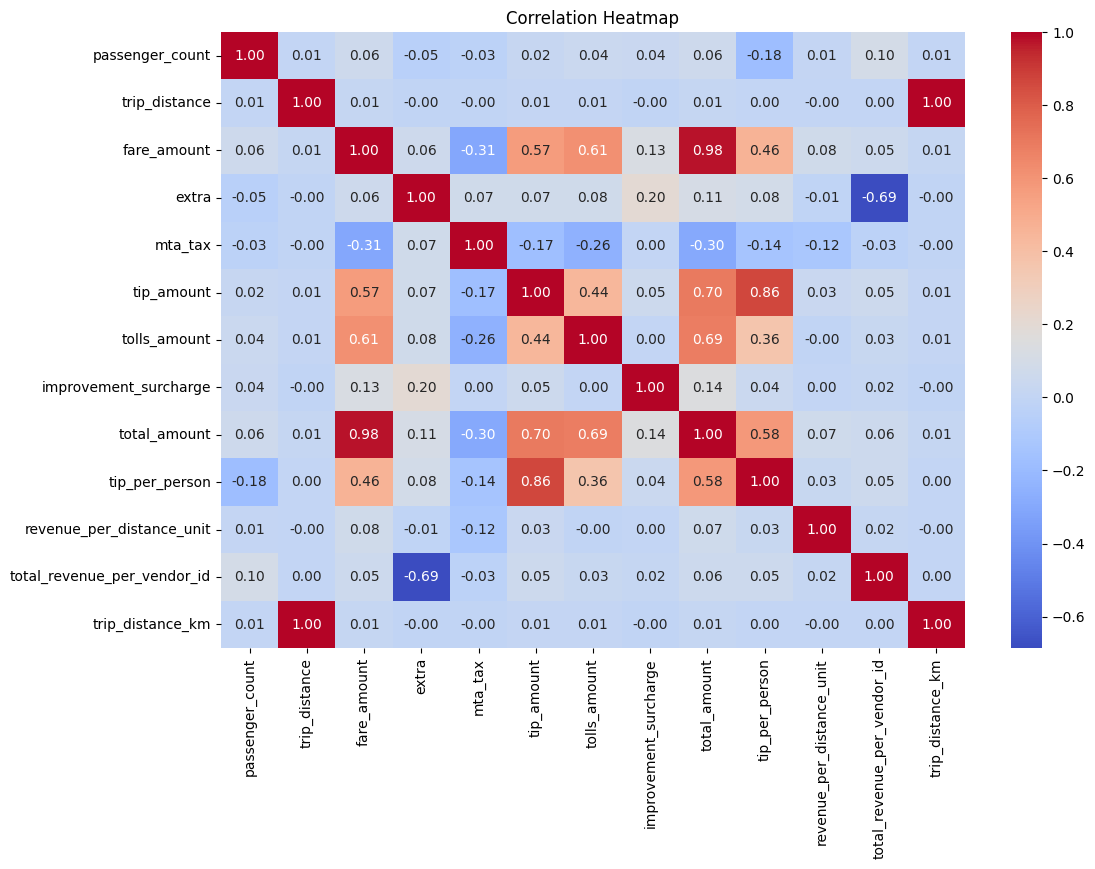

In [29]:
import seaborn as sns

numeric_columns = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'tip_per_person', 'revenue_per_distance_unit', 'total_revenue_per_vendor_id', 'trip_distance_km']


correlation_matrix = df[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### 5.3.) Predict price (fare_amount)

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Mean Squared Error: 253.59038009405597


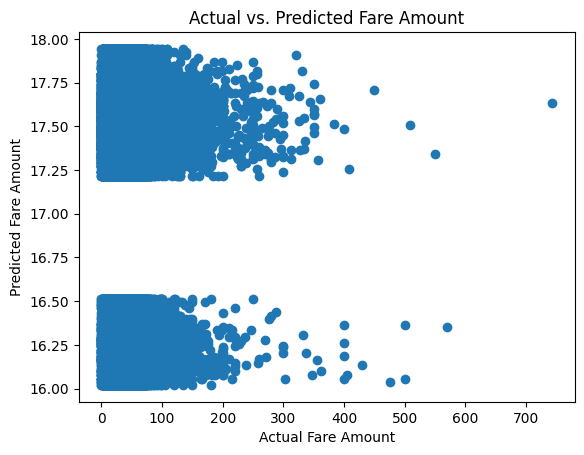

In [34]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour


df['is_workday'] = np.where(df['pickup_day_of_week'] < 5, 1, 0)

features = ['pickup_day_of_week', 'pickup_hour', 'is_workday']
target = 'fare_amount'

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.title("Actual vs. Predicted Fare Amount")
plt.show()

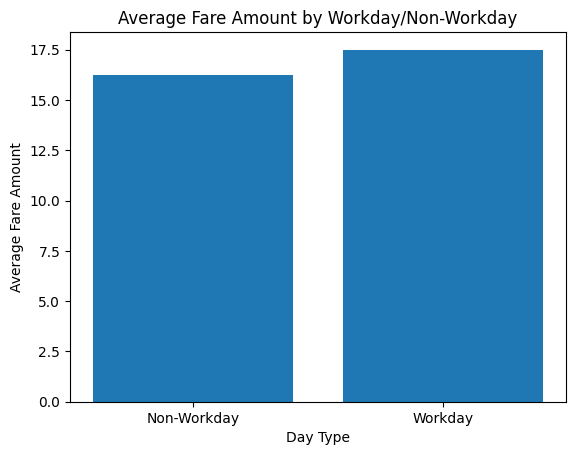

In [35]:
fare_by_workday = df.groupby('is_workday')['fare_amount'].mean()

# Create a bar plot to compare the average fare amounts
plt.bar(['Non-Workday', 'Workday'], fare_by_workday.values)
plt.xlabel('Day Type')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Workday/Non-Workday')
plt.show()

**pickup_day_of_week**:

- **Argumentation**: The day of the week can influence taxi fares. For example, fares may be higher on weekdays during rush hours or lower on weekends. Including this feature allows the model to capture such variations.
- **Importance**: High

**pickup_hour**:

- **Argumentation**: The time of day can also have a significant impact on taxi fares. Fare rates may vary based on time, with surges during peak hours. Including this feature helps the model consider time-related patterns.
- **Importance**: High

**is_workday**:

- **Argumentation**: The distinction between workdays and weekends can affect taxi demand and pricing. People may use taxis more frequently on workdays for commuting. This binary feature allows the model to differentiate between these two scenarios.
- **Importance**: Medium